In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
co2 = pd.read_csv("co2.csv", sep = '\t')
co2.head()

,data,media
0,1980.042,338.45
1,1980.125,339.15
2,1980.208,339.48
3,1980.292,339.87
4,1980.375,340.30


<module 'matplotlib.pyplot' from '/home/edcarlos/anaconda3/envs/data_science/lib/python3.6/site-packages/matplotlib/pyplot.py'>

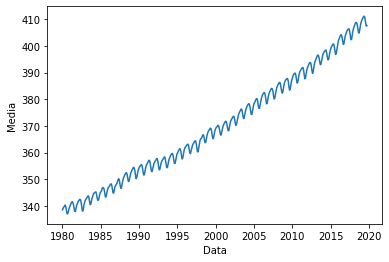

In [3]:
plt.plot(co2['data'], co2['media'])
plt.ylabel('Media')
plt.xlabel('Data')
plt

In [4]:
nasc = pd.read_csv('nascimentos.csv')
nasc.head()

,data,n_nasc
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [5]:
nasc['data'] = pd.to_datetime(nasc['data'])

<module 'matplotlib.pyplot' from '/home/edcarlos/anaconda3/envs/data_science/lib/python3.6/site-packages/matplotlib/pyplot.py'>

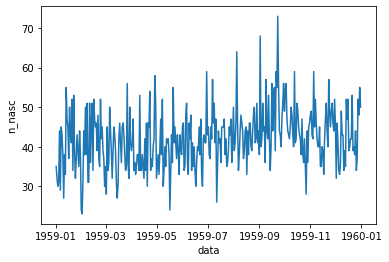

In [6]:
plt.plot(nasc['data'], nasc['n_nasc'])
plt.ylabel('n_nasc')
plt.xlabel('data')
plt

In [7]:
media_carb = co2['media'].mean()
media_carb

370.10314465408806

In [8]:
dt_carb = co2['data'][1] - co2['data'][0]
dt_carb

0.0829999999998563

<module 'matplotlib.pyplot' from '/home/edcarlos/anaconda3/envs/data_science/lib/python3.6/site-packages/matplotlib/pyplot.py'>

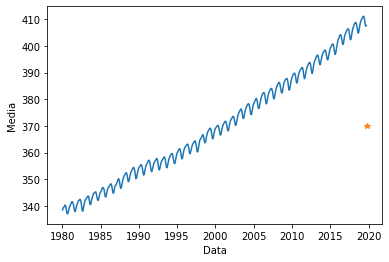

In [9]:
plt.plot(co2['data'], co2['media'])
plt.plot(co2.iloc[-1, 0] + dt_carb, media_carb, "*")
plt.ylabel('Media')
plt.xlabel('Data')
plt

In [10]:
media_nasc = nasc['n_nasc'].mean()
media_nasc

41.98082191780822

In [11]:
dt_nasc = nasc['data'][1] - nasc['data'][0]
dt_nasc

Timedelta('1 days 00:00:00')

<module 'matplotlib.pyplot' from '/home/edcarlos/anaconda3/envs/data_science/lib/python3.6/site-packages/matplotlib/pyplot.py'>

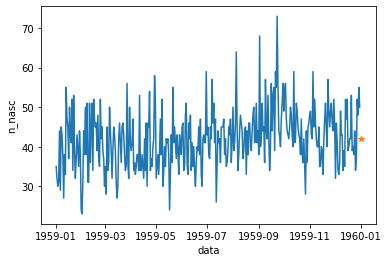

In [12]:
plt.plot(nasc['data'], nasc['n_nasc'])
plt.plot(nasc.iloc[-1, 0] + dt_nasc, media_nasc, "*")
plt.ylabel('n_nasc')
plt.xlabel('data')
plt

In [13]:
media_tres_pontos_co2 = co2['media'].tail(3).mean()
media_tres_pontos_co2

407.92333333333335

<module 'matplotlib.pyplot' from '/home/edcarlos/anaconda3/envs/data_science/lib/python3.6/site-packages/matplotlib/pyplot.py'>

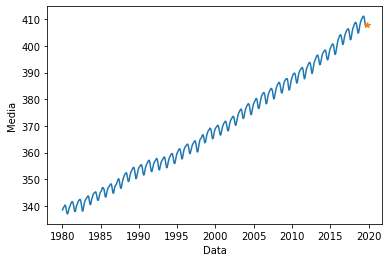

In [14]:
plt.plot(co2['data'], co2['media'])
plt.plot(co2.iloc[-1, 0] + dt_carb, media_tres_pontos_co2, "*")
plt.ylabel('Media')
plt.xlabel('Data')
plt

In [15]:
media_tres_pontos_nasc = nasc['n_nasc'].tail(3).mean()
media_tres_pontos_nasc

51.0

<module 'matplotlib.pyplot' from '/home/edcarlos/anaconda3/envs/data_science/lib/python3.6/site-packages/matplotlib/pyplot.py'>

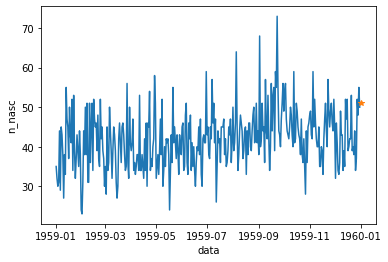

In [16]:
plt.plot(nasc['data'], nasc['n_nasc'])
plt.plot(nasc.iloc[-1, 0] + dt_nasc, media_tres_pontos_nasc, "*")
plt.ylabel('n_nasc')
plt.xlabel('data')
plt